Explore GSS data (split into areas of interest)

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler

df_happy = pd.read_csv('happy.csv')
df_jobs = pd.read_csv('jobs.csv')
df_social = pd.read_csv('social.csv')
df_internet = pd.read_csv('internet.csv')

In [3]:
df_happy['General happiness'].value_counts()

Pretty happy     33563
Very happy       18823
Not too happy     7668
Don't know          39
Name: General happiness, dtype: int64

In [0]:
df_happy = df_happy.rename(columns={
    'Gss year for this respondent                       ' : 'year'})

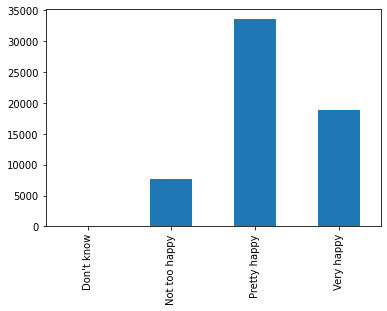

In [5]:
# let's start out by looking at general happiness across time
df_neighbs = pd.get_dummies(df_happy["General happiness"])
df_neighbs.sum().plot.bar()

People are generally pretty happy over all time. Does happiness change over time?

In [0]:
df_neighbs.index = df_happy['year']

In [7]:
df_neighbs.head()

,Don't know,Not too happy,Pretty happy,Very happy
year,,,,
1972.0,0,1,0,0
1972.0,0,1,0,0
1972.0,0,0,1,0
1972.0,0,1,0,0
1972.0,0,0,1,0


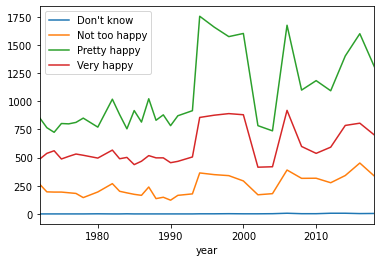

In [8]:
happy_groups = df_neighbs.groupby('year')['Don\'t know', 'Not too happy',
                           'Pretty happy', 'Very happy'].sum()

#you'll probably have to do a crosstab for each year :|
happy_groups.index
happy_groups.plot.line()

So people are always (according to this data) more likely to say that they are "pretty happy" than they are to say very happy. The least amount of people say they are not happy.

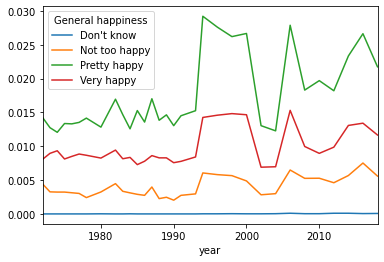

In [9]:
happy_groups = df_neighbs.groupby('year')['Don\'t know', 'Not too happy',
                           'Pretty happy', 'Very happy'].sum()
happy_groups.reset_index()
df_happy_new = df_happy[df_happy['year'] == 2018]
joint_year_happy = pd.crosstab(
    df_happy["year"],
    df_happy["General happiness"],
    normalize=True
)
joint_year_happy.plot.line()

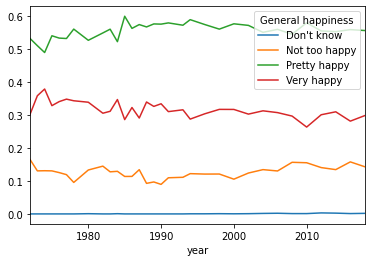

In [10]:
happiness_given_type = joint_year_happy.divide(
    joint_year_happy.sum(axis=1),
    axis=0
)
happiness_given_type.plot.line()
# I just did this out of curiosity, to see if...given year
# they are more likely to be happy/unhappy
# happiness_given_type.plot.line()

In [0]:
df_financial_sat = pd.get_dummies(df_happy['Satisfaction with financial situation'])
df_financial_sat['happiness'] = df_happy['General happiness']

The goal here is to sum the number of each type of satisfaction by happiness. AKA see how many people are satisfied unsatisfied based on how happy they are. Are people who are unsatisfied more likely to be unhappy?

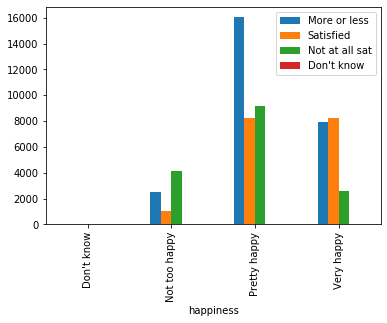

In [0]:
df_financial_sat.groupby('happiness')['More or less',
                                              'Satisfied',
                                              'Not at all sat',
                                              'Don\'t know'].sum().plot.bar()

There definitely appears to be a connection between "satisfied" and "very happy". Also, we can see that there are very few people who say they are not happy but also say they are not happy. This would appear to be a good predictor.

**Job trends**

What does work look like for each type of happiness? Specifically, income.

In [0]:
df_jobs = df_jobs[df_jobs['Rs income in constant $'] != 'Source']
df_jobs['income'] = df_jobs['Rs income in constant $'].astype(float)
df_jobs = df_jobs[df_jobs['income'] > 0]

/usr/local/lib/python3.6/dist-packages/pandas/core/ops/__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


In [11]:
df_jobs['income'].describe()

count     37887.000000
mean      22326.359234
std       28581.794500
min         227.000000
25%        8156.000000
50%       16563.000000
75%       27171.000000
max      480144.472900
Name: income, dtype: float64

Here, I'd like to go through each income and see how many people are in each happiness category.

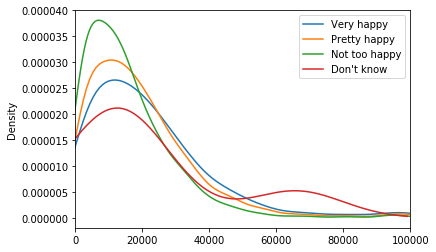

In [0]:
df_jobs['income'] = df_jobs['Rs income in constant $'].astype(float)
for gen_hap in df_jobs["General happiness"].unique():
  if not pd.isna(gen_hap):
    df_jobs[df_jobs["General happiness"] == gen_hap]["income"].plot.density(
        label=gen_hap,
        legend=True,
        xlim=(0, 100000)
    )

This also appears to be a good predictor. We can see that the roles switch just after 20000. People are very likely to say unhappy with a low income, but people with a high income are always more likely to say very happy or pretty happy.

I'll scroll over and look closer at higher income to prove this point.

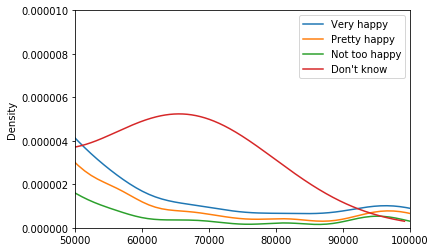

In [0]:
for gen_hap in df_jobs["General happiness"].unique():
  if not pd.isna(gen_hap):
    df_jobs[df_jobs["General happiness"] == gen_hap]["income"].plot.density(
        label=gen_hap,
        legend=True,
        xlim=(50000, 100000),
        ylim=(0, .00001)
    )

In [0]:
(len(df_jobs[df_jobs['income']>50000]) / len(df_jobs)) * 100

6.244886108691635

^ 
6% of people in this dataset have an income of 50000 or greater. That is still a large chunk of this dataset, all of which are more likely to say they are happy.

In [0]:
print(len(df_jobs[df_jobs['income']>100000]))
len(df_jobs[df_jobs['income']>100000]) / len(df_jobs) * 100

716


1.8898302847942565

^ The above was more out of curiosity. Just under 2% of people in this dataset are above 100000 and still have the same happiness trend. 716 is not a small number.

Below I scope in on the 100000 to 150000 just to look at the trend closer.

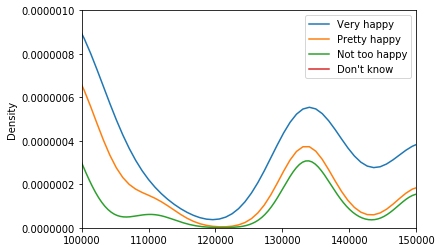

In [0]:
for gen_hap in df_jobs["General happiness"].unique():
  if not pd.isna(gen_hap):
    df_jobs[df_jobs["General happiness"] == gen_hap]["income"].plot.density(
        label=gen_hap,
        legend=True,
        xlim=(100000, 150000),
        ylim = (0, .000001)
    )

**Social Trends**

In [0]:
df_social.head()

,Unnamed: 0,index,Spend evening with siblings,Spend evening with relatives,Spend evening with neighbor,Spend evening with parents,Spend evening with friends,Spend evening at bar,General happiness,siblings,relatives,neighbor,parents,friends,social_score
0,9120,9120,Sev times a year,Sev times a year,Never,Never,Sev times a year,Never,Pretty happy,4,4,1,1,4,14
1,9121,9121,Sev times a year,Sev times a week,Sev times a week,No such people,Sev times a year,Never,Pretty happy,4,6,6,0,4,20
2,9122,9122,Never,Once a month,Once a month,Sev times a mnth,Once a month,Sev times a mnth,Very happy,1,3,3,5,3,15
3,9123,9123,Sev times a year,Sev times a week,Once a month,No such people,Sev times a year,Sev times a year,Very happy,4,6,3,0,4,17
4,9124,9124,Sev times a mnth,Once a month,Sev times a mnth,Sev times a mnth,Sev times a year,Once a month,Pretty happy,5,3,5,5,4,22


For each type of social practice I'd like to look at happiness level. For each I'll do a sum of each category of happiness and look at what is higher.

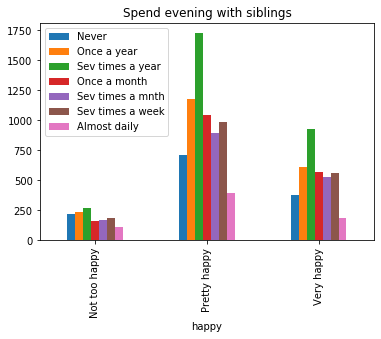

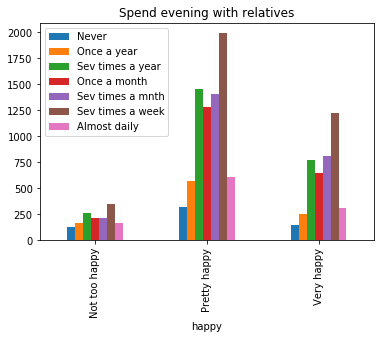

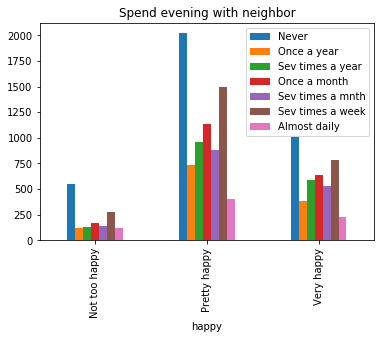

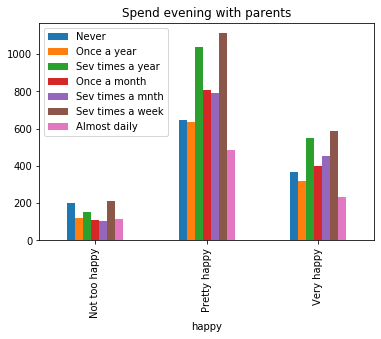

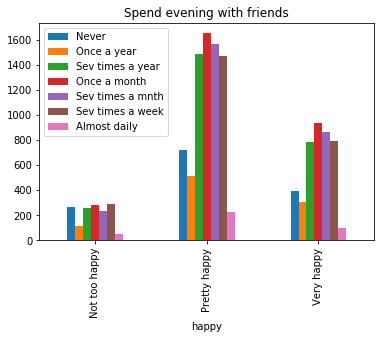

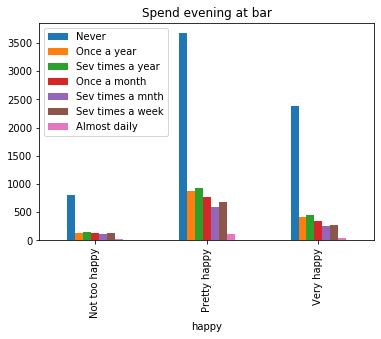

In [0]:
headers = ['Spend evening with siblings',
           'Spend evening with relatives',
           'Spend evening with neighbor',
           'Spend evening with parents',
           'Spend evening with friends',
           'Spend evening at bar']

for head in headers:
  df_social_dummy = pd.get_dummies(df_social[head])
  df_social_dummy['happy'] = df_social['General happiness']
  df_social_dummy.groupby('happy')['Never',
                                  'Once a year',
                                  'Sev times a year',
                                  'Once a month',
                                  'Sev times a mnth',
                                  'Sev times a week',
                                  'Almost daily'].sum().plot.bar(title=head)

In [0]:
df_social[['General happiness', 'social_score']].groupby('General happiness')['social_score'].mean()

General happiness
Not too happy    17.370444
Pretty happy     18.451621
Very happy       18.483377
Name: social_score, dtype: float64

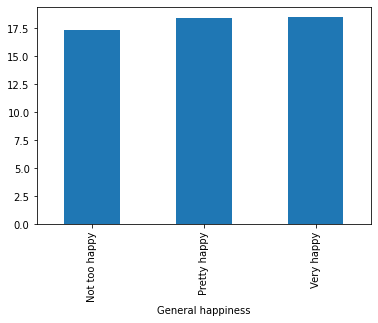

In [0]:
df_social[['General happiness', 'social_score']].groupby('General happiness')['social_score'].mean().plot.bar()

Screen time trends

In [0]:
df_internet

,Unnamed: 0,index,week_web,week_email,week_tv,weekend_internet,weekend_internet_minutes,weekday_internet,weekday_internet_minutes,Gss year for this respondent,General happiness,internet_per_week,screen_time_per_week
0,59604,59604,2,2,1,0,30,1,0,2016.0,Very happy,5,14
1,59609,59609,7,2,1,4,0,7,0,2016.0,0,43,52
2,59611,59611,50,10,7,12,0,12,0,2016.0,Very happy,84,143
3,59617,59617,15,1,1,2,0,3,0,2016.0,Pretty happy,19,27
4,59621,59621,1,1,3,3,0,3,0,2016.0,Very happy,21,43
...,...,...,...,...,...,...,...,...,...,...,...,...,...
601,62438,62438,14,8,2,3,0,2,0,2016.0,Pretty happy,16,38
602,62451,62451,5,20,3,0,30,1,0,2016.0,Very happy,5,46
603,62454,62454,10,5,1,4,0,2,0,2016.0,Pretty happy,18,30
604,62456,62456,21,12,6,2,0,2,0,2016.0,Pretty happy,14,68


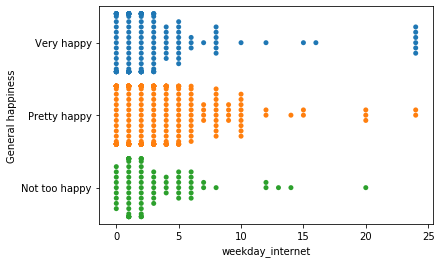

In [0]:
ax = sns.swarmplot(data=df_internet, x='weekday_internet',
                   y ='General happiness' , 
                   order =['Very happy' , 'Pretty happy' , 'Not too happy'])
plt.show()

I found the above very confusing...according to this, some of the highest internet users are the most happy. Maybe they falsely identify how happy they are?

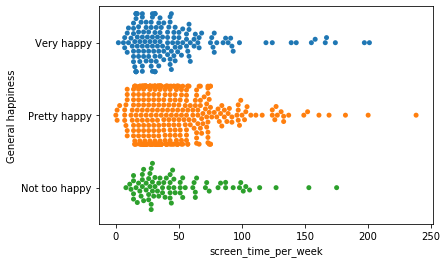

In [0]:
ax = sns.swarmplot(data=df_internet,
                   x='screen_time_per_week',
                   y ='General happiness' ,
                   order =['Very happy' , 'Pretty happy' , 'Not too happy'])
plt.show()

Again, happy users seem to spend many hours on the internet. 

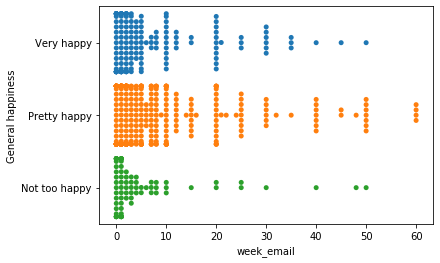

In [0]:
ax = sns.swarmplot(data=df_internet,
                   x='week_email',
                   y ='General happiness' ,
                   order =['Very happy' , 'Pretty happy' , 'Not too happy'])
plt.show()

There doesn't seem to be too much correlation between internet hours and happiness. The values are generally spread out and trim down as hours get higher.